# 丢弃

In [52]:
import pandas as pd

In [67]:
df_cell_blind = pd.read_csv('../data_mca_pure/drug_sensitivity_lung_CellBlind_test2&prediction_mca_pure.csv')
print(df_cell_blind.shape)
df_cell_blind.head()

(12948, 6)


,Unnamed: 0,drug,cell_line,IC50,OncotreeCode,prediction
0,0,5-Fluorouracil,OPM2,3.454205,PCM,3.065674
1,1,5-azacytidine,OPM2,1.412405,PCM,2.234261
2,2,A-366,OPM2,3.899873,PCM,4.410223
3,3,ABT737,OPM2,1.208203,PCM,-0.565135
4,4,AGI-5198,OPM2,3.522023,PCM,4.286114


In [70]:
# 筛选出OncotreeCode为LUAD、LUSC、SCLC、NSCLC、LCLC的数据
# df_LUNG = df_cell_blind[df_cell_blind['OncotreeCode'].isin(['LUAD', 'LUSC', 'SCLC', 'NSCLC', 'LCLC'])]
df_LUNG = df_cell_blind[df_cell_blind['OncotreeCode'].isin(['LUAD', 'LUSC', 'SCLC', 'LCLC'])]
print(df_LUNG.shape)
df_LUNG.head()

(2764, 6)


,Unnamed: 0,drug,cell_line,IC50,OncotreeCode,prediction
10184,10184,5-Fluorouracil,NCIH1693,6.857719,LUAD,4.673050
10185,10185,5-azacytidine,NCIH1693,5.688483,LUAD,3.083095
10186,10186,A-366,NCIH1693,7.367789,LUAD,4.749055
10187,10187,ABT737,NCIH1693,3.165363,LUAD,2.690125
10188,10188,AGI-5198,NCIH1693,5.673127,LUAD,4.705739


In [82]:
# 剔除cell_line为NCIH1355、EKVX的数据    'NCIH1355', 'EKVX'
df_LUNG = df_LUNG[~df_LUNG['cell_line'].isin(['NCIH2405'])]

In [83]:

# df_LUNG根据cell_line分组计数，结果显示每个cell_line有多少个drug，并且保留OncotreeCode
df_LUNG_count = df_LUNG.groupby(['cell_line', 'OncotreeCode']).count().reset_index()[['cell_line', 'OncotreeCode', 'drug']]
df_LUNG_count.head(20)


,cell_line,OncotreeCode,drug
0,EKVX,LUAD,215
1,HCC15,LUSC,216
2,LU135,SCLC,217
3,NCIH1299,LCLC,218
4,NCIH146,SCLC,180
5,NCIH1693,LUAD,217
6,NCIH1793,LUAD,217
7,NCIH1915,LCLC,217
8,NCIH1963,SCLC,200
9,NCIH441,LUAD,218


In [84]:
# 将df_LUNG根据cell_line分组，再取每组drug列的交集
df_LUNG_drug = df_LUNG.groupby('cell_line')['drug'].apply(set).reset_index()
df_LUNG_drug.head(20)

,cell_line,drug
0,EKVX,"{LMP744, Lestaurtinib, Rucaparib, Niraparib, O..."
1,HCC15,"{LMP744, Lestaurtinib, Rucaparib, Niraparib, O..."
2,LU135,"{LMP744, Lestaurtinib, Rucaparib, Niraparib, O..."
3,NCIH1299,"{LMP744, Lestaurtinib, Rucaparib, Niraparib, O..."
4,NCIH146,"{Lestaurtinib, Rucaparib, Niraparib, OSI-027, ..."
5,NCIH1693,"{LMP744, Lestaurtinib, Rucaparib, Niraparib, O..."
6,NCIH1793,"{LMP744, Lestaurtinib, Rucaparib, Niraparib, O..."
7,NCIH1915,"{LMP744, Lestaurtinib, Rucaparib, Niraparib, O..."
8,NCIH1963,"{LMP744, Lestaurtinib, Niraparib, OSI-027, Tas..."
9,NCIH441,"{LMP744, Lestaurtinib, Rucaparib, Niraparib, O..."


In [85]:
# 将df_LUNG_drug中的drug取交集
drugs = set.intersection(*df_LUNG_drug['drug'])
print(len(drugs))
print(drugs)

147
{'Lestaurtinib', 'Niraparib', 'OSI-027', 'Taselisib', 'AZD5582', 'Sapitinib', 'AGK2', 'Afuresertib', 'Pictilisib', 'EPZ5676', 'Crizotinib', 'KU-55933', 'Tanespimycin', 'Fulvestrant', 'GSK2606414', 'NVP-ADW742', 'Ulixertinib', 'Axitinib', 'GSK343', 'PFI-1', 'Temozolomide', 'Dactolisib', 'PLX-4720', 'Doramapimod', 'OF-1', 'AGI-6780', 'Ribociclib', 'GDC0810', '5-Fluorouracil', 'Bosutinib', 'Talazoparib', 'AZD4547', 'Paclitaxel', 'Savolitinib', 'EHT-1864', 'Telomerase Inhibitor IX', 'BMS-754807', 'LCL161', 'SB590885', 'Sepantronium bromide', 'Olaparib', 'GNE-317', 'PD173074', 'LY2109761', 'WZ4003', 'LGK974', 'GW441756', 'Trametinib', 'Entinostat', 'AZD7762', 'ML323', 'Venetoclax', 'PRIMA-1MET', 'Oxaliplatin', 'Lenalidomide', 'Selumetinib', 'Dactinomycin', 'VE-822', 'Pevonedistat', 'I-BET-762', 'Dinaciclib', 'OTX015', 'Gefitinib', 'SCH772984', 'Gemcitabine', 'I-BRD9', 'ABT737', 'MK-2206', 'PD0325901', 'ZM447439', 'Palbociclib', 'Lapatinib', 'RO-3306', 'Cyclophosphamide', 'XAV939', 'MN-6

In [86]:
# 取df_LUNG中drug中在drugs中的数据
df_LUNG_Filtered = df_LUNG[df_LUNG['drug'].isin(drugs)][['drug', 'cell_line', 'prediction', 'OncotreeCode','IC50']]
print(df_LUNG_Filtered.shape)
df_LUNG_Filtered.head()

(1764, 5)


,drug,cell_line,prediction,OncotreeCode,IC50
10184,5-Fluorouracil,NCIH1693,4.673050,LUAD,6.857719
10187,ABT737,NCIH1693,2.690125,LUAD,3.165363
10188,AGI-5198,NCIH1693,4.705739,LUAD,5.673127
10189,AGI-6780,NCIH1693,4.649806,LUAD,6.959928
10190,AGK2,NCIH1693,3.391694,LUAD,4.260822


In [87]:
df_drug_mean_std = pd.read_csv('../data/gdsc_drug_mean_std.csv')
df_drug_mean_std.head()

,Drug_Name,IC50_mean,IC50_std
0,123138,2.898762,0.831312
1,123829,2.586956,1.618564
2,150412,3.168315,1.088161
3,5-Fluorouracil,4.392229,1.719760
4,5-azacytidine,2.988221,1.390814


In [88]:
# 根据df_drug_mean_std中的"Drug_Name"列、"IC50_mean"列和"IC50_std"列计算出df_LUAD的Z-Score
df_LUNG_Filtered_ZScore = pd.merge(df_LUNG_Filtered, df_drug_mean_std, left_on='drug', right_on='Drug_Name')
df_LUNG_Filtered_ZScore['Z-Score'] = (df_LUNG_Filtered_ZScore['prediction'] - df_LUNG_Filtered_ZScore['IC50_mean']) / df_LUNG_Filtered_ZScore['IC50_std']
df_LUNG_Filtered_ZScore.head()

,drug,cell_line,prediction,OncotreeCode,IC50,Drug_Name,IC50_mean,IC50_std,Z-Score
0,5-Fluorouracil,NCIH1693,4.673050,LUAD,6.857719,5-Fluorouracil,4.392229,1.719760,0.163291
1,ABT737,NCIH1693,2.690125,LUAD,3.165363,ABT737,1.875342,2.053694,0.396740
2,AGI-5198,NCIH1693,4.705739,LUAD,5.673127,AGI-5198,4.704103,0.907583,0.001803
3,AGI-6780,NCIH1693,4.649806,LUAD,6.959928,AGI-6780,4.344912,1.086023,0.280744
4,AGK2,NCIH1693,3.391694,LUAD,4.260822,AGK2,3.264510,0.926755,0.137236


In [89]:
#####测试代码########
# 统计每种药物的Z-Score的均值
df_LUNG_Filtered_ZScore_mean = df_LUNG_Filtered_ZScore.groupby('drug')['Z-Score'].mean().reset_index()
df_LUNG_Filtered_ZScore_mean.head(200)



,drug,Z-Score
0,5-Fluorouracil,0.160923
1,ABT737,-0.137898
2,AGI-5198,0.287006
3,AGI-6780,0.148005
4,AGK2,0.074300
...,...,...
142,WZ4003,0.439226
143,Wnt-C59,0.283707
144,XAV939,0.105614
145,YK-4-279,-0.020662


In [90]:
# 剔除cell_line为NCIH1355、EKVX的数据
# df_LUNG_Filtered_ZScore = df_LUNG_Filtered_ZScore[~df_LUNG_Filtered_ZScore['cell_line'].isin(['NCIH1355', 'EKVX'])]
# df_LUNG_Filtered_ZScore = df_LUNG_Filtered_ZScore[~df_LUNG_Filtered_ZScore['cell_line'].isin(['NCIH2228', 'HCC827'])]

In [91]:
df_LUNG_Filtered_ZScore['cell_line'] = df_LUNG_Filtered_ZScore['OncotreeCode'] + '.' + df_LUNG_Filtered_ZScore['cell_line']

In [92]:
# 使用pivot函数，将df_LUNG_Filtered_ZScore的drug列作为行索引，cell_line列作为列索引，prediction列作为值
df_LUNG_Filtered_ZScore_pivot = df_LUNG_Filtered_ZScore.pivot(index='drug', columns='cell_line', values='Z-Score')
df_LUNG_Filtered_ZScore_pivot.head()

cell_line,LCLC.NCIH1299,LCLC.NCIH1915,LUAD.EKVX,LUAD.NCIH1693,LUAD.NCIH1793,LUAD.NCIH441,LUSC.HCC15,LUSC.NCIH520,SCLC.LU135,SCLC.NCIH146,SCLC.NCIH1963,SCLC.NCIH526
drug,,,,,,,,,,,,
5-Fluorouracil,-0.101017,0.512014,0.009547,0.163291,0.358808,0.777747,-0.281658,0.548992,-0.249106,0.611499,0.355230,-0.774270
ABT737,0.527328,0.833606,0.515564,0.396740,0.651699,0.408261,0.497858,-0.135085,-1.184218,-0.767459,-1.183874,-2.215194
AGI-5198,0.098431,0.648169,0.231063,0.001803,0.740167,0.627820,0.048796,0.889375,0.050338,0.937352,0.431730,-1.260967
AGI-6780,-0.220783,0.420363,-0.068969,0.280744,0.249097,0.864879,0.177967,0.065059,0.018065,0.389195,0.359340,-0.758894
AGK2,-0.158098,0.499291,-0.071023,0.137236,-0.035087,0.380892,0.128595,0.157807,-0.168514,0.638981,0.095213,-0.713687


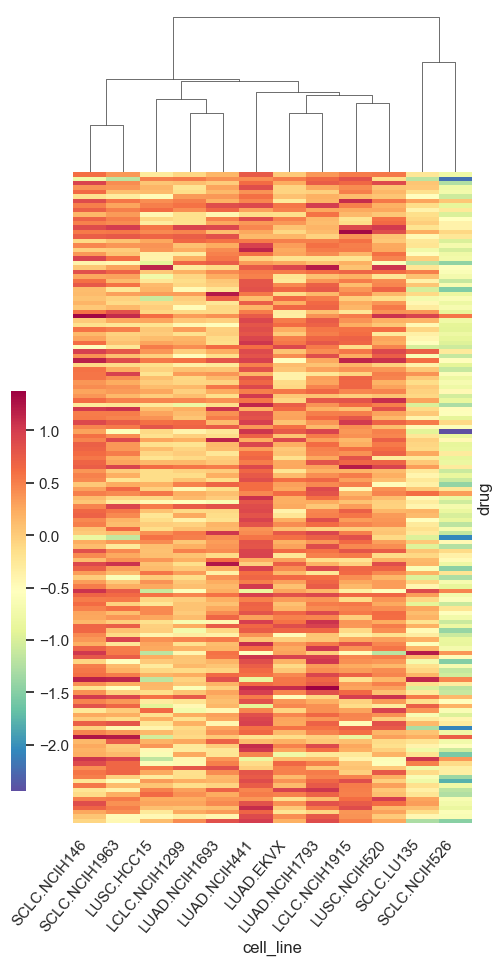

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
# iris = sns.load_dataset("iris")
# species = iris.pop("species")
# heatmap_data = pd.read_csv('heatmap_data.csv')
cell_line_names = df_LUNG_Filtered_ZScore_pivot.columns
heatmap_data = df_LUNG_Filtered_ZScore_pivot.iloc[:,0:]
#设置图片大小
g= sns.clustermap(heatmap_data,row_cluster=False,col_cluster=True, metric='euclidean',
                  fmt="d",cmap='Spectral_r',figsize=(5,10),
                  dendrogram_ratio=(.1, .2),
                    cbar_pos=(0, .2, .03, .4)
                  , yticklabels=False)
ax = g.ax_heatmap
label_y = ax.get_yticklabels()
plt.setp(label_y, rotation=360, horizontalalignment='left')
label_x = ax.get_xticklabels()
plt.setp(label_x, rotation=50, horizontalalignment='right')
#设置图片名称，分辨率，并保存
# plt.savefig('cluster.tif',dpi = 300)
plt.show()